In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data_for_exam.xlsx - Sheet1.csv')

In [3]:
df.shape

(99, 12)

In [4]:
df.head()

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,6/8/2014,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes


In [10]:

# Handling missing values
df['Consumer complaint narrative'].fillna('Unknown', inplace=True)
df['Company public response'].fillna('No response', inplace=True)

# Converting to datetime format (handle non-date values)
df['Date received'] = pd.to_datetime(df['Date received'])
df['Company response to consumer'] = pd.to_datetime(df['Company response to consumer'], errors='coerce')  # 'coerce' handles non-date values

# Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['Product', 'Sub-product', 'State', 'Submitted via'])

# Calculating response time
df_encoded['Response time'] = (df_encoded['Company response to consumer'] - df_encoded['Date received']).dt.days

# Dropping irrelevant columns
df_cleaned = df_encoded.drop(['Company response to consumer', 'ZIP code'], axis=1)

# Display the cleaned dataset
print(df_cleaned.head())



  Date received                       Consumer complaint narrative  \
0    2014-03-12                                            Unknown   
1    2017-01-19  When my loan was switched over to Navient i wa...   
2    2018-04-06  I tried to sign up for a spending monitoring p...   
3    2014-06-08                                            Unknown   
4    2014-09-13                                            Unknown   

  Company public response                            Company Timely response?  \
0             No response               M&T BANK CORPORATION              Yes   
1             No response            Navient Solutions, LLC.              Yes   
2             No response  CAPITAL ONE FINANCIAL CORPORATION              Yes   
3             No response           AMERICAN EXPRESS COMPANY              Yes   
4             No response                     CITIBANK, N.A.              Yes   

  Consumer disputed?  Product_Bank account or service  Product_Consumer Loan  \
0           

In [20]:
df_cleaned.columns

Index(['Date received', 'Consumer complaint narrative',
       'Company public response', 'Company', 'Timely response?',
       'Consumer disputed?', 'Product_Bank account or service',
       'Product_Consumer Loan', 'Product_Credit card',
       'Product_Credit card or prepaid card', 'Product_Credit reporting',
       'Product_Credit reporting, credit repair services, or other personal consumer reports',
       'Product_Debt collection',
       'Product_Money transfer, virtual currency, or money service',
       'Product_Money transfers', 'Product_Mortgage', 'Product_Student loan',
       'Sub-product_Auto', 'Sub-product_Checking account',
       'Sub-product_Conventional adjustable mortgage (ARM)',
       'Sub-product_Conventional fixed mortgage',
       'Sub-product_Conventional home mortgage', 'Sub-product_Credit card',
       'Sub-product_Credit reporting',
       'Sub-product_Domestic (US) money transfer', 'Sub-product_FHA mortgage',
       'Sub-product_Federal student loan servi

# Problem 1: Product Distribution and Dispute Rates

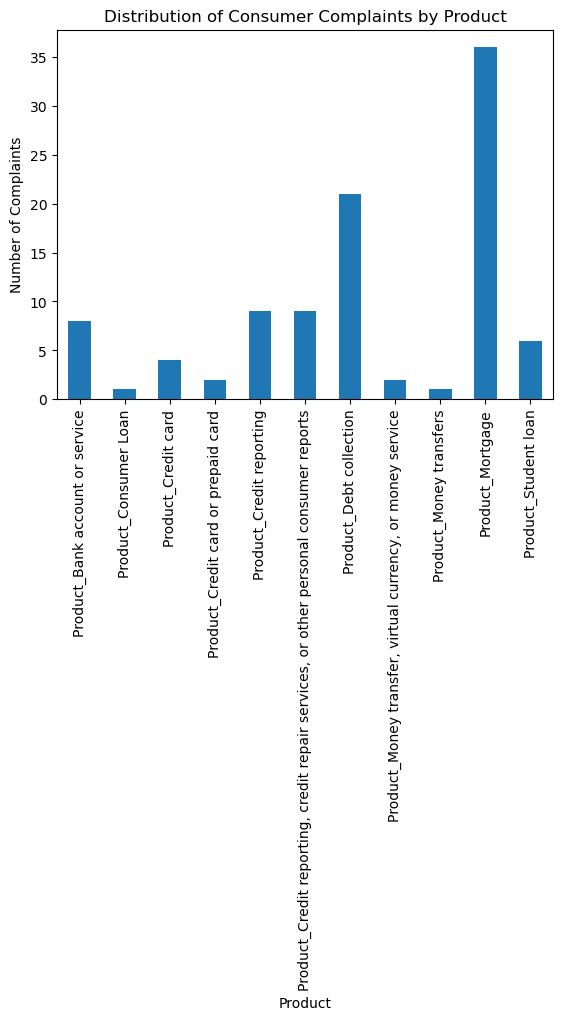

Product_Credit reporting
0    0.711111
1    0.333333
Name: Consumer disputed?, dtype: float64


In [28]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Label encode 'Consumer disputed?' column
le = LabelEncoder()
df_cleaned['Consumer disputed?'] = le.fit_transform(df_cleaned['Consumer disputed?'])

# Visualize distribution of products
product_counts = df_cleaned.filter(like='Product_').sum()
product_counts.plot(kind='bar')
plt.title('Distribution of Consumer Complaints by Product')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)
plt.show()

# Analyze dispute rates by product
dispute_rates = df_cleaned.groupby('Product_Credit reporting')['Consumer disputed?'].mean()
print(dispute_rates)


# Problem 2: Consumer Sentiment Analysis

In [29]:
pip install textblob


Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 636.8/636.8 kB 253.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from textblob import TextBlob

# Sentiment analysis using TextBlob
df_cleaned['Sentiment'] = df_cleaned['Consumer complaint narrative'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Analyze relation between sentiment and disputes
dispute_sentiment = df_cleaned.groupby('Consumer disputed?')['Sentiment'].mean()
print(dispute_sentiment)


Consumer disputed?
0   -0.085505
1   -0.100000
2   -0.042003
Name: Sentiment, dtype: float64


# Problem 3: Company Response Time and Disputes



In [31]:
# Calculate the count of each response time category
response_time_counts = df_cleaned['Timely response?'].value_counts()

# Calculate the count of disputes within each response time category
disputed_counts = df_cleaned[df_cleaned['Consumer disputed?'] == 'Yes']['Timely response?'].value_counts()

# Calculate the proportion of disputes within each response time category
response_dispute_rates = disputed_counts / response_time_counts

print(response_dispute_rates)



Yes   NaN
Name: Timely response?, dtype: float64


# Problem 4: Geographical Analysis


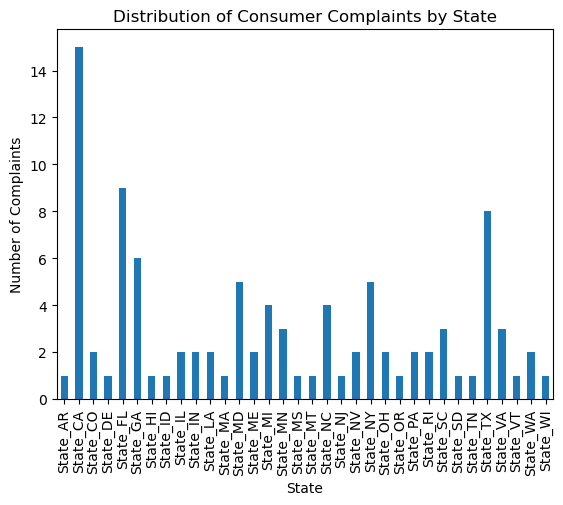

In [32]:
# Sum up the complaints for each state
state_complaints = df_cleaned.filter(like='State_').sum()

# Plot the distribution of complaints by state
state_complaints.plot(kind='bar')
plt.title('Distribution of Consumer Complaints by State')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)
plt.show()


In [33]:

dispute_rates_state = df_cleaned.groupby('State_CA')['Consumer disputed?'].mean()

print(dispute_rates_state)


State_CA
0    0.714286
1    0.466667
Name: Consumer disputed?, dtype: float64


# Problem 5: Consumer Complaint Trends Over Time

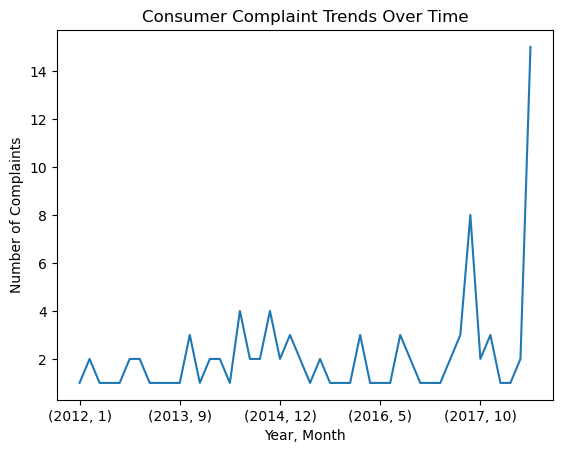

In [34]:

df_cleaned['Date received'] = pd.to_datetime(df_cleaned['Date received'])

# Grouping complaints by year and month
complaints_over_time = df_cleaned.groupby([df_cleaned['Date received'].dt.year, df_cleaned['Date received'].dt.month])['Consumer complaint narrative'].count()

# Plotting the trends over time
complaints_over_time.plot(kind='line')
plt.title('Consumer Complaint Trends Over Time')
plt.xlabel('Year, Month')
plt.ylabel('Number of Complaints')
plt.show()



In [41]:
df_cleaned.columns

Index(['Date received', 'Consumer complaint narrative',
       'Company public response', 'Company', 'Consumer disputed?',
       'Product_Bank account or service', 'Product_Consumer Loan',
       'Product_Credit card', 'Product_Credit card or prepaid card',
       'Product_Credit reporting',
       'Product_Credit reporting, credit repair services, or other personal consumer reports',
       'Product_Debt collection',
       'Product_Money transfer, virtual currency, or money service',
       'Product_Money transfers', 'Product_Mortgage', 'Product_Student loan',
       'Sub-product_Auto', 'Sub-product_Checking account',
       'Sub-product_Conventional adjustable mortgage (ARM)',
       'Sub-product_Conventional fixed mortgage',
       'Sub-product_Conventional home mortgage', 'Sub-product_Credit card',
       'Sub-product_Credit reporting',
       'Sub-product_Domestic (US) money transfer', 'Sub-product_FHA mortgage',
       'Sub-product_Federal student loan servicing',
       'Sub-p

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Prepare the data
X = df_cleaned.drop(['Consumer disputed?'], axis=1)
y = df_cleaned['Consumer disputed?']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode categorical features
categorical_columns = ['Product_Bank account or service', 'Product_Consumer Loan', 'Product_Credit card', 'Product_Credit card or prepaid card', 'Product_Credit reporting', 'Product_Credit reporting, credit repair services, or other personal consumer reports', 'Product_Debt collection', 'Product_Money transfer, virtual currency, or money service', 'Product_Money transfers', 'Product_Mortgage', 'Product_Student loan', 'Sub-product_Auto', 'Sub-product_Checking account', 'Sub-product_Conventional adjustable mortgage (ARM)', 'Sub-product_Conventional fixed mortgage', 'Sub-product_Conventional home mortgage', 'Sub-product_Credit card', 'Sub-product_Credit reporting', 'Sub-product_Domestic (US) money transfer', 'Sub-product_FHA mortgage', 'Sub-product_Federal student loan servicing', 'Sub-product_General-purpose credit card or charge card', 'Sub-product_I do not know', 'Sub-product_International money transfer', 'Sub-product_Medical', 'Sub-product_Medical debt', 'Sub-product_Mobile or digital wallet', 'Sub-product_Mortgage', 'Sub-product_Non-federal student loan', 'Sub-product_Other (i.e. phone, health club, etc.)', 'Sub-product_Other bank product/service', 'Sub-product_Other debt', 'Sub-product_Other mortgage', 'Sub-product_Payday loan', 'Sub-product_Store credit card', 'Sub-product_Vehicle loan', 'State_AR', 'State_CA', 'State_CO', 'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_ID', 'State_IL', 'State_IN', 'State_LA', 'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MS', 'State_MT', 'State_NC', 'State_NJ', 'State_NV', 'State_NY', 'State_OH', 'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'Submitted via_Fax', 'Submitted via_Phone', 'Submitted via_Postal mail', 'Submitted via_Referral', 'Submitted via_Web', 'Response time', 'Year', 'Month']
df_cleaned_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

# Initialize and fit the model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Logistic Regression Model")
print("Accuracy:", accuracy)
print("F1 Score:", f1)


TypeError: float() argument must be a string or a number, not 'Timestamp'